In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("key_times.csv")

In [4]:
df.head() # Note times are in seconds

,key,time,distance,iteration
0,w,0.807533,1,0
1,;,0.824346,0,0
2,.,0.813559,1,0
3,/,0.818652,1,0
4,p,0.631220,1,0


In [5]:
avg_times = df.groupby(["key"], as_index=False).mean()[["key", "time", "distance"]]

In [6]:
avg_times.head()

,key,time,distance
0,',0.708456,1.0
1,",",0.752540,1.0
2,.,0.824321,1.0
3,/,0.799975,1.0
4,;,0.854735,0.0


In [7]:
avg_times.columns = ["Key", "Average Time (s)", "Distance"]

In [8]:
avg_times["Distance"] = avg_times["Distance"].astype("int")

In [9]:
avg_times.head()

,Key,Average Time (s),Distance
0,',0.708456,1
1,",",0.752540,1
2,.,0.824321,1
3,/,0.799975,1
4,;,0.854735,0


The modifier will be average time * (distance + 1) to account for `0`

In [16]:
key2position = {
    "a": 0,
    "s": 0,
    "d": 0,
    "f": 0,
    "g": 0,
    "h": 0,
    "j": 0,
    "k": 0,
    "l": 0,
    ";": 0,
    "'": 0,
    "q": 1,
    "w": 1,
    "e": 1,
    "r": 1,
    "t": 1,
    "y": 1,
    "u": 1,
    "i": 1,
    "o": 1,
    "p": 1,
    "[": 1,
    "]": 1,
    "z": 2,
    "x": 2,
    "c": 2,
    "v": 2,
    "b": 2,
    "n": 2,
    "m": 2,
    ",": 2,
    ".": 2,
    "/": 2
}

In [24]:
import numpy as np
avg_times["Modifier"] = avg_times["Average Time (s)"] * np.log((avg_times["Distance"] + 1) * (avg_times["Key"].replace(key2position) + 1))

In [25]:
avg_times.head()

,Key,Average Time (s),Distance,Modifier
0,',0.708456,1,0.491064
1,",",0.752540,1,1.348371
2,.,0.824321,1,1.476985
3,/,0.799975,1,1.433363
4,;,0.854735,0,0.000000


In [26]:
avg_times.to_csv("baseline/with_modifier.csv")

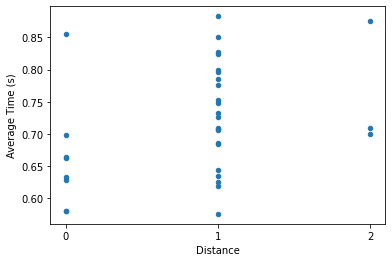

In [27]:
avg_times[["Distance", "Average Time (s)"]].plot(
    kind="scatter", 
    x="Distance", 
    y="Average Time (s)",
    xticks=[0,1,2]
);